In [1]:
import pandas as pd
import kaggle
import zipfile
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
import random


In [2]:
file_names = os.listdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\part1')
print(file_names)

['100_0_0_20170112213500903.jpg', '100_0_0_20170112215240346.jpg', '100_1_0_20170110183726390.jpg', '100_1_0_20170112213001988.jpg', '100_1_0_20170112213303693.jpg', '100_1_0_20170112215032192.jpg', '100_1_0_20170117195420803.jpg', '100_1_0_20170119212053665.jpg', '100_1_2_20170105174847679.jpg', '100_1_2_20170110182836729.jpg', '100_1_2_20170112213615815.jpg', '100_1_2_20170112222336458.jpg', '101_0_0_20170112213500903.jpg', '101_1_2_20170105174739309.jpg', '103_0_2_20170112213001988.jpg', '105_0_0_20170112213001988.jpg', '105_1_0_20170112213001988.jpg', '105_1_0_20170112213021902.jpg', '105_1_0_20170112213507183.jpg', '105_1_1_20170112213303693.jpg', '10_0_0_20161220222308131.jpg', '10_0_0_20170103200329407.jpg', '10_0_0_20170103200522151.jpg', '10_0_0_20170103233459275.jpg', '10_0_0_20170104013211746.jpg', '10_0_0_20170110215927291.jpg', '10_0_0_20170110220033115.jpg', '10_0_0_20170110220111082.jpg', '10_0_0_20170110220235233.jpg', '10_0_0_20170110220251986.jpg', '10_0_0_20170110220

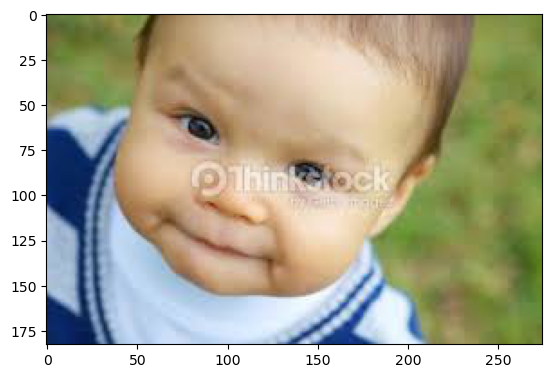

In [3]:
#display image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\part1\\1_0_0_20161219140623097.jpg')
imgplt = plt.imshow(img)
plt.show()

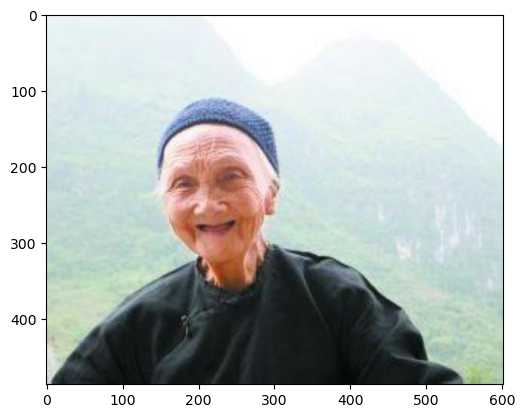

In [4]:
#display image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\part1\\101_1_2_20170105174739309.jpg')
imgplt = plt.imshow(img)
plt.show()

In [5]:
len(file_names)

24108

###### Resizing images to 224x224

In [6]:
original_folder = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\part1\\'
resized_folder = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\image_resized_224\\'

for filename in os.listdir(original_folder):
    img_path = original_folder+filename
    
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    
    newImgPath = resized_folder+filename
    img.save(newImgPath)

KeyboardInterrupt: 

###### Splitting up labels:

In [6]:
directory = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\image_resized_224\\'
age = [ ]
gender = [ ]
ethnicity = [ ]
date_time = [ ]
img_path = [ ] 

for file in os.listdir(directory):
    if file.endswith('.jpg') or file.endswith('.png'):
        components = file.split('_')
        age.append(int(components[0]))
        
        # Handle gender and ethnicity components without converting to int
        if len(components) > 2:  # Check if there are enough components
            gender.append(components[1])
            ethnicity.append(components[2])
        else:
            gender.append('Unknown')
            ethnicity.append('Unknown')
        
        # Append the datetime string without the file extension
        if len(components) > 3:  # Check if there are enough components
            date_time.append(components[3].split('.')[0])
        else:
            date_time.append('Unknown')
        
        img_path.append(file)

In [7]:
len(age)

24108

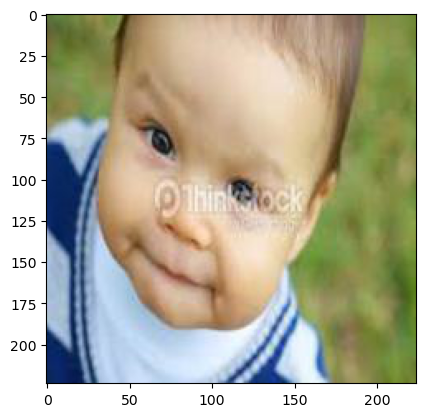

In [8]:
#display resized image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\image_resized_224\\1_0_0_20161219140623097.jpg')
imgplt = plt.imshow(img)
plt.show()

###### Reshaping as array

In [9]:
import cv2
import glob
directory = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\image_resized_224\\'

image_extension = ['png', 'jpg']
files = []

[files.extend(glob.glob(directory + '*.' + e)) for e in image_extension]

images = np.asarray([cv2.imread(file) for file in files])

In [10]:
images.shape

(24108, 224, 224, 3)

###### Ethnicity pred

In [11]:
X_ethnicity = images
Y_ethnicity = np.asarray(ethnicity, dtype=str)
print(X_ethnicity.dtype, Y_ethnicity.dtype)

uint8 <U21


In [12]:
values, counts = np.unique(Y_ethnicity, return_counts = True)
print(values)
print(counts)

['0' '1' '2' '20170109142408075.jpg' '20170109150557335.jpg'
 '20170116174525125.jpg' '3' '4']
[10223  4558  3586     1     1     1  4027  1711]


In [13]:
valid_indices = np.where((Y_ethnicity != '20170109142408075.jpg') & (Y_ethnicity != '20170109150557335.jpg') & (Y_ethnicity != '20170116174525125.jpg'))[0]

# Use the valid indices to filter both images and gender arrays
X_ethnicity = X_ethnicity[valid_indices]
Y_ethnicity = Y_ethnicity[valid_indices]

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_ethnicity = encoder.fit_transform(Y_ethnicity)

In [15]:
values, counts = np.unique(Y_ethnicity, return_counts = True)
print(values)
print(counts)

[0 1 2 3 4]
[10223  4558  3586  4027  1711]


In [16]:
indices_to_keep = np.where(Y_ethnicity != 4)[0]

In [17]:
# Filter X_ethnicity and Y_ethnicity using the indices
X_ethnicity = X_ethnicity[indices_to_keep]
Y_ethnicity = Y_ethnicity[indices_to_keep]

In [18]:
values, counts = np.unique(Y_ethnicity, return_counts = True)
print(values)
print(counts)

[0 1 2 3]
[10223  4558  3586  4027]


In [19]:
print(X_ethnicity.shape, Y_ethnicity.shape)

(22394, 224, 224, 3) (22394,)


In [64]:
counts[np.where(values == 0)]

array([10223], dtype=int64)

###### Train Test Split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ethnicity,Y_ethnicity, test_size = .2, stratify = Y_ethnicity)
print(X_ethnicity.shape, X_train.shape, X_test.shape)

(22394, 224, 224, 3) (17915, 224, 224, 3) (4479, 224, 224, 3)


In [21]:
print(type(Y_train))
print(Y_train.shape)

<class 'numpy.ndarray'>
(17915,)


###### Class Weights

In [22]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(Y_train), y = Y_train)
for class_label, weight in zip(np.unique(Y_train), class_weights):
    print(f"Class {class_label}: Weight {weight}")

Class 0: Weight 0.5476583516752263
Class 1: Weight 1.2284009873834338
Class 2: Weight 1.561084001394214
Class 3: Weight 1.3900527622594663


###### Training and testing generators

In [23]:
batch_size = 4

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (rescale=1./255,
                                    rotation_range=55,
                                    width_shift_range=0.3,
                                    height_shift_range=0.3,
                                    shear_range=0.3,
                                    zoom_range=0.3,
                                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow(x=X_train,
                                     y=Y_train,
                                     batch_size=batch_size,
                                     )

test_generator = test_datagen.flow(x=X_test,
                                   y=Y_test,
                                   batch_size=batch_size,
                                   )


###### MobilenetV2 using gender's model

In [26]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping

# Load the pretrained model using TensorFlow Hub
pretrained_model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"
pretrained_model = hub.KerasLayer(pretrained_model_url, trainable=False)

num_of_classes = 4

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    tf.keras.layers.Lambda(lambda x: pretrained_model(x)),
    tf.keras.layers.Dense(256, activation='relu'),
    kernel_regularizer=tf.keras.regularizers.l2(0.01)
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_of_classes, activation='softmax'), 
    kernel_regularizer=tf.keras.regularizers.l2(0.01)
])

# Print model summary
model.summary()


C:\Users\Zooby\anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       256,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,540 (1006.02 KB)

 Trainable params: 257,540 (1006.02 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#Compiling model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),  # Experiment with different optimizers and learning rates
    loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
    metrics=['accuracy']
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [28]:
history = model.fit(train_generator, 
                                 batch_size = 4, 
                                 validation_data = test_generator, 
                                 epochs = 10, callbacks = [early_stopping],
                                 class_weight=dict(enumerate(class_weights)),
                                 verbose=1)

Epoch 1/10


C:\Users\Zooby\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4479/4479 ━━━━━━━━━━━━━━━━━━━━ 325s 72ms/step - accuracy: 0.3133 - loss: 2.1009 - val_accuracy: 0.5285 - val_loss: 1.1410
Epoch 2/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 310s 69ms/step - accuracy: 0.4463 - loss: 1.3954 - val_accuracy: 0.5689 - val_loss: 1.0776
Epoch 3/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 308s 69ms/step - accuracy: 0.4745 - loss: 1.3092 - val_accuracy: 0.5791 - val_loss: 1.0410
Epoch 4/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 305s 68ms/step - accuracy: 0.4968 - loss: 1.2936 - val_accuracy: 0.5950 - val_loss: 1.0161
Epoch 5/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 303s 67ms/step - accuracy: 0.5084 - loss: 1.2440 - val_accuracy: 0.6024 - val_loss: 1.0044
Epoch 6/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 303s 68ms/step - accuracy: 0.5255 - loss: 1.2189 - val_accuracy: 0.6124 - val_loss: 0.9937
Epoch 7/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 308s 69ms/step - accuracy: 0.5219 - loss: 1.2306 - val_accuracy: 0.6111 - val_loss: 0.9916
Epoch 8/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 307s 69ms/step - accuracy: 0.5305 - lo

In [29]:
score, acc = model.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)

1120/1120 ━━━━━━━━━━━━━━━━━━━━ 51s 46ms/step - accuracy: 0.6237 - loss: 0.9734
Test Loss = 0.9706827402114868
Test Accuracy = 0.6242464780807495


Path of the image to be predicted: C:\\Users\\Zooby\\Desktop\\gender_test_images\\jyoti.jpg


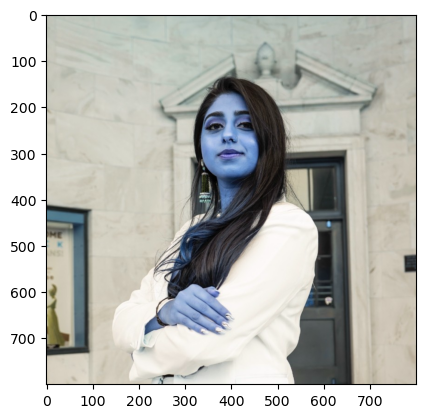

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
[[0.26719782 0.10832705 0.43609345 0.18838167]]
2
Ethnicity: Asian


In [30]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('Ethnicity: White')

elif input_pred_label == 1:
  print('Ethnicity: Black')

elif input_pred_label == 2:
  print('Ethnicity: Asian')

elif input_pred_label == 3:
  print('Ethnicity: Indian')

#elif input_pred_label == 4:
#  print('Ethnicity: Other')

In [32]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

In [32]:
#!pip install keras==3.0.5

In [1]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.1.1


In [28]:
#!pip install scikeras

###### Hyperparameter tuned mobilenetv2

In [26]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

# Define a function to create and compile the model
def create_model(learning_rate=2e-5, dropout_rate=0.5, l2_penalty=0.01):
    # Load the pretrained model using TensorFlow Hub
    pretrained_model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"
    pretrained_model = hub.KerasLayer(pretrained_model_url, trainable=False)

    num_of_classes = 4

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
        tf.keras.layers.Lambda(lambda x: pretrained_model(x)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_penalty)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_of_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(l2_penalty))
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create a KerasClassifier wrapper for use with Scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid for RandomSearch
param_grid = {
    'learning_rate': [1e-3, 2e-3, 5e-4],
    'dropout_rate': [0.3, 0.4, 0.5],
    'l2_penalty': [0.001, 0.01, 0.1]
}

# Perform RandomSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1)
random_search.fit(train_generator)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Fit the model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(train_generator, 
               batch_size = 4, 
               epochs=10, 
               validation_data=test_generator, 
               callbacks=[early_stopping], 
               class_weight=dict(enumerate(class_weights)), 
               verbose = 1)




Fitting 3 folds for each of 10 candidates, totalling 30 fits


PicklingError: Could not pickle the task to send it to the workers.

###### InceptionResNetv2 with hyperparameters randomsearchcv

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create and compile the model
def create_model(learning_rate=2e-5, dropout_rate=0.5, l2_penalty=0.01):
    # Load the pretrained model using TensorFlow Hub
    pretrained_model_url = "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5"
    pretrained_model = hub.KerasLayer(pretrained_model_url, trainable=False)

    num_of_classes = 4

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(299, 299, 3)),  # Adjust input size for InceptionResNetV2
        tf.keras.layers.Lambda(lambda x: pretrained_model(x)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_penalty)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_of_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(l2_penalty))
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create a KerasClassifier wrapper for use with Scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid for RandomSearch
param_grid = {
    'learning_rate': [1e-3, 2e-3, 5e-4],
    'dropout_rate': [0.3, 0.4, 0.5],
    'l2_penalty': [0.001, 0.01, 0.1]
}

# Perform RandomSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1)
random_search.fit(train_generator)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Fit the model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(train_generator, 
               batch_size = 4, 
               epochs=10, 
               validation_data=test_generator, 
               callbacks=[early_stopping], 
               class_weight=dict(enumerate(class_weights)), 
               verbose = 1)


###### ResNet50

In [1]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (256,256,3)) 
convolutional_base.summary() #learn the architecture behind ResNet50
model = models.Sequential()
model.add(layers.UpSampling2D((2,2))) 
model.add(layers.UpSampling2D((2,2))) 
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation = 'softmax')) #output layer



C:\Users\Zooby\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [2]:
model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5), loss = 'sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_trained_scaled_ethnicity, Y_train, validation_split=0.1, epochs=10, batch_size = 4, class_weight=dict(enumerate(class_weights)))

NameError: name 'X_trained_scaled_ethnicity' is not defined

###### EfficientNet

In [26]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


# Split your data into training and validation sets
#X_trained_scaled_ethnicity, X_val, Y_train, Y_val = train_test_split(X_trained_scaled_ethnicity, Y_train, test_size=0.1)

# Load the pretrained EfficientNetB0 model
convolutional_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the model architecture with dropout layers
x = Flatten()(convolutional_base.output)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)  # Reduced number of units with L2 regularization
x = Dropout(0.5)(x)  # Add dropout layer with dropout rate of 0.5
output = Dense(4, activation='softmax')(x)  # Output layer
model_efficientnet = Model(convolutional_base.input, output)

# Compile the model
model_efficientnet.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
# Define batch size
batch_size = 4

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



history = model_efficientnet.fit(train_generator, 
                                 batch_size = 4, 
                                 validation_data = test_generator, 
                                 epochs = 10, callbacks = [early_stopping],
                                 class_weight=dict(enumerate(class_weights)),
                                 verbose=1)
# Train the model using augmented data
#history = model_efficientnet.fit(X_trained_scaled_ethnicity, Y_train,
#                    epochs=10,
#                    batch_size=batch_size,
#                    validation_data=(X_val, Y_val),
#                    callbacks=[early_stopping],
#                    class_weight=dict(enumerate(class_weights)),
#                    verbose=1)  # Added verbose argument to display training progress


Epoch 1/10


C:\Users\Zooby\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4479/4479 ━━━━━━━━━━━━━━━━━━━━ 1617s 357ms/step - acc: 0.3207 - loss: 2.6701 - val_acc: 0.5796 - val_loss: 1.5158
Epoch 2/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 1629s 364ms/step - acc: 0.3984 - loss: 1.5348 - val_acc: 0.5506 - val_loss: 1.5442
Epoch 3/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 1642s 367ms/step - acc: 0.4603 - loss: 1.4102 - val_acc: 0.6827 - val_loss: 1.0827
Epoch 4/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 1647s 368ms/step - acc: 0.5072 - loss: 1.3307 - val_acc: 0.6961 - val_loss: 1.0167
Epoch 5/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 1632s 364ms/step - acc: 0.5342 - loss: 1.2633 - val_acc: 0.7357 - val_loss: 0.9262
Epoch 6/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 1624s 362ms/step - acc: 0.5438 - loss: 1.2259 - val_acc: 0.7533 - val_loss: 1.0220
Epoch 7/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 1632s 364ms/step - acc: 0.5740 - loss: 1.1956 - val_acc: 0.7680 - val_loss: 0.9494
Epoch 8/10
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 1621s 362ms/step - acc: 0.5789 - loss: 1.1615 - val_acc: 0.7790 - val_loss: 1.0156
Epoch 9/10


In [27]:
score, acc = model_efficientnet.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)

1120/1120 ━━━━━━━━━━━━━━━━━━━━ 62s 56ms/step - acc: 0.7341 - loss: 0.9234
Test Loss = 0.9259992241859436
Test Accuracy = 0.7356553077697754


In [38]:
model_path = 'C:\\Users\\Zooby\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\efficientnetv1.h5'
model_efficientnet.save(model_path)

###### Trying EfficientNet with Logits

In [27]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



# Load the pretrained EfficientNetB0 model
convolutional_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the model architecture with dropout layers
x = Flatten()(convolutional_base.output)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)  # Reduced number of units with L2 regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Add dropout layer with dropout rate of 0.5
output = Dense(4)(x)  # Output layer
model_efficientnet = Model(convolutional_base.input, output)

# Compile the model
model_efficientnet.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])
# Define batch size
batch_size = 4

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



history = model_efficientnet.fit(train_generator, 
                                 batch_size = 4, 
                                 validation_data = test_generator, 
                                 epochs = 15, callbacks = [early_stopping],
                                 class_weight=dict(enumerate(class_weights)),
                                 verbose=1)



Epoch 1/15


C:\Users\Zooby\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4479/4479 ━━━━━━━━━━━━━━━━━━━━ 2237s 495ms/step - acc: 0.3152 - loss: 6.9336 - val_acc: 0.5046 - val_loss: 5.2501
Epoch 2/15
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 2023s 452ms/step - acc: 0.4035 - loss: 5.2695 - val_acc: 0.5309 - val_loss: 3.8170
Epoch 3/15
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 2024s 452ms/step - acc: 0.4283 - loss: 3.9123 - val_acc: 0.6345 - val_loss: 2.6612
Epoch 4/15
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 2034s 454ms/step - acc: 0.4744 - loss: 2.8878 - val_acc: 0.6388 - val_loss: 2.0001
Epoch 5/15
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 2037s 455ms/step - acc: 0.4923 - loss: 2.3112 - val_acc: 0.6758 - val_loss: 1.6313
Epoch 6/15
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 2214s 494ms/step - acc: 0.5204 - loss: 1.8868 - val_acc: 0.6818 - val_loss: 1.4512
Epoch 7/15
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 2438s 544ms/step - acc: 0.5372 - loss: 1.6591 - val_acc: 0.7098 - val_loss: 1.3426
Epoch 8/15
4479/4479 ━━━━━━━━━━━━━━━━━━━━ 2443s 545ms/step - acc: 0.5487 - loss: 1.5067 - val_acc: 0.7225 - val_loss: 1.3304
Epoch 9/15


In [28]:
score, acc = model_efficientnet.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)

1120/1120 ━━━━━━━━━━━━━━━━━━━━ 94s 83ms/step - acc: 0.7863 - loss: 0.7417
Test Loss = 0.7389271259307861
Test Accuracy = 0.7863362431526184


Path of the image to be predicted: C:\\Users\\Zooby\\Desktop\\gender_test_images\\guy_getout.jpg


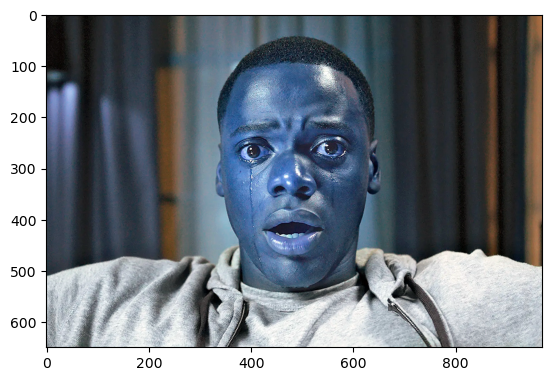

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[-1.5902812  0.6158435 -1.2915611 -3.748201 ]]
1
Ethnicity: Black


In [67]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model_efficientnet.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('Ethnicity: White')

elif input_pred_label == 1:
  print('Ethnicity: Black')

elif input_pred_label == 2:
  print('Ethnicity: Asian')

elif input_pred_label == 3:
  print('Ethnicity: Indian')

elif input_pred_label == 4:
  print('Ethnicity: Other')

In [37]:
model_path = 'C:\\Users\\Zooby\Desktop\\Personal Projects\\Age_Gender_Ethnicity_pred\\efficientnetv2.h5'
model_efficientnet.save(model_path)

In [30]:
import tensorflow as tf
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Load the pretrained ResNet50 model
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3)) 
convolutional_base.summary()  # Learn the architecture behind ResNet50

# Create the classification model
model = Sequential()
model.add(convolutional_base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))  # Output layer

# Wrap optimizer with LossScaleOptimizer (optional)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5)
optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Train the model
history = model.fit(X_trained_scaled_ethnicity, Y_train, validation_split=0.1, epochs=10, batch_size=4, class_weight=dict(enumerate(class_weights)))


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

MemoryError: Unable to allocate 3.18 GiB for an array with shape (17355, 128, 128, 3) and data type float32

###### MobilenetV2

In [26]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


# Load the pretrained model using TensorFlow Hub
pretrained_model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"
pretrained_model = hub.KerasLayer(pretrained_model_url, trainable=False)

# Define the function to build the model
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
        tf.keras.layers.Lambda(lambda x: pretrained_model(x)),
        tf.keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
        tf.keras.layers.Dense(5)
    ])
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),  # Add more learning rate options
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model

# Define the tuner with increased max_trials
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Increased number of trials
    directory='hyperparameter_tuning',
    project_name='mobilenetv2_ethnicity'
)

# Perform the hyperparameter search
tuner.search(train_generator, validation_data = test_generator, epochs=5)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps}")

# Build and compile the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)
final_model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


# Train the final model
final_model.fit(train_generator, 
                batch_size = 2,
                validation_data = test_generator, 
                epochs=10, 
                callbacks = [early_stopping],
                class_weight=dict(enumerate(class_weights)),
                verbose = 1
               )  # Increased number of epochs


Reloading Tuner from hyperparameter_tuning\mobilenetv2_ethnicity\tuner0.json
Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x0000019FF0C62250>


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)               │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 352)            │       352,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         1,765 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,469 (1.35 MB)

 Trainable params: 354,469 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9642/9642 ━━━━━━━━━━━━━━━━━━━━ 354s 36ms/step - accuracy: 0.3202 - loss: 1.8478 - val_accuracy: 0.5167 - val_loss: 1.2744
Epoch 2/10
9642/9642 ━━━━━━━━━━━━━━━━━━━━ 363s 38ms/step - accuracy: 0.3514 - loss: 1.5266 - val_accuracy: 0.5306 - val_loss: 1.2451
Epoch 3/10
9642/9642 ━━━━━━━━━━━━━━━━━━━━ 359s 37ms/step - accuracy: 0.3583 - loss: 1.5102 - val_accuracy: 0.5244 - val_loss: 1.2921
Epoch 4/10
9642/9642 ━━━━━━━━━━━━━━━━━━━━ 361s 37ms/step - accuracy: 0.3737 - loss: 1.4847 - val_accuracy: 0.4140 - val_loss: 1.3766
Epoch 5/10
 393/9642 ━━━━━━━━━━━━━━━━━━━━ 4:38 30ms/step - accuracy: 0.3840 - loss: 1.4350

KeyboardInterrupt: 

###### Resnet trying again

In [26]:
import tensorflow as tf
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3)) 
convolutional_base.summary() #learn the architecture behind ResNet50

model = models.Sequential()
#model.add(layers.UpSampling2D((4,4))) #upsampling2d scales image height and width by 2x
#model.add(layers.UpSampling2D((2,2))) #resnet50 takes images with input shape 256,256. but our images are 32,32
#model.add(layers.UpSampling2D((2,2))) #hence we add 3 layers of upsampling. 32*2 = 64*2 = 128*2 = 256
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation = 'softmax')) #output layer

model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5), loss = 'sparse_categorical_crossentropy', metrics=['acc'])

# Train the final model
model.fit(train_generator, 
                batch_size = 2,
                validation_data = test_generator, 
                epochs=10, 
                callbacks = [early_stopping],
                class_weight=dict(enumerate(class_weights)),
                verbose = 1
               )  # Increased number of epochs

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/10
3854/9642 ━━━━━━━━━━━━━━━━━━━━ 52:13 541ms/step - acc: 0.2220 - loss: 1.8330

KeyboardInterrupt: 